# Code to create the circo-like graphs among ROIs

This notebook also contains other early trials with `graph-tool` that were not included in the paper in favour of the very last plot at the end of this notebook.

I was not able to remove the inner flow arrows of the plot, so they are removed in Inkscape before being included in the paper.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import graph_tool.all as gt
import numpy as np

## Early trials with graph-tool

In [2]:
# From official documentation
g = gt.load_graph("../search_example.xml")
name = g.vp["name"]
weight = g.ep["weight"]
pos = g.vp["pos"]

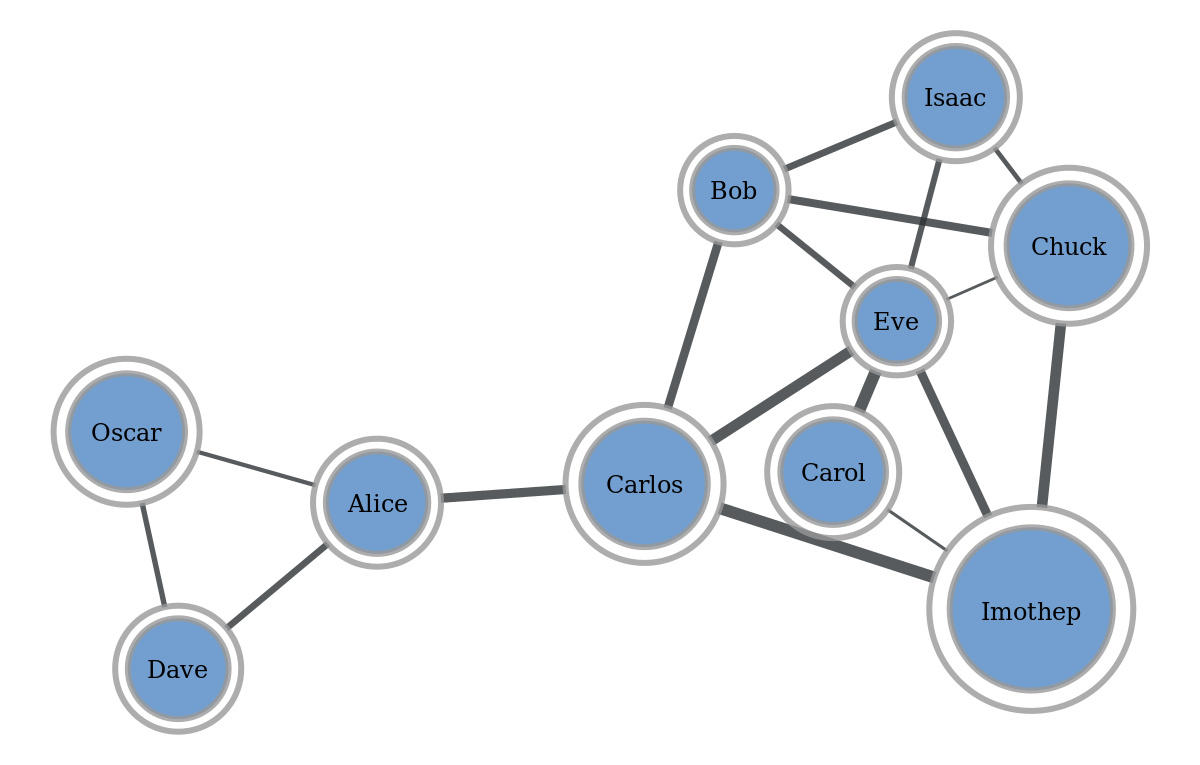

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f82f4a98a90, at 0x7f83fa530750>

In [3]:
gt.graph_draw(g, pos, vertex_text=name, vertex_font_size=12, vertex_shape="double_circle",
              vertex_fill_color="#729fcf", vertex_pen_width=3,
              edge_pen_width=weight, #output="search_example.svg")
              inline=True)

In [3]:
STRUCT_SIMPLE_NAMES = ['L.BSTS', 'L.CACG', 'L.CMFG', 'L.CU', 'L.EC', 'L.FG', 'L.IPG', 'L.ITG', 'L.ICG', 'L.LOG', 'L.LOFG', 'L.LG', 'L.MOFG', 'L.MTG', 'L.PHIG', 'L.PaCG', 'L.POP', 'L.POR', 'L.PTR', 'L.PCAL', 'L.PoCG', 'L.PCG', 'L.PrCG', 'L.PCU', 'L.RACG', 'L.RMFG', 'L.SFG', 'L.SPG', 'L.STG', 'L.SMG', 'L.FP', 'L.TP', 'L.TTG', 'L.IN', 'R.BSTS', 'R.CACG', 'R.CMFG', 'R.CU', 'R.EC', 'R.FG', 'R.IPG', 'R.ITG', 'R.ICG', 'R.LOG', 'R.LOFG', 'R.LG', 'R.MOFG', 'R.MTG', 'R.PHIG', 'R.PaCG', 'R.POP', 'R.POR', 'R.PTR', 'R.PCAL', 'R.PoCG', 'R.PCG', 'R.PrCG', 'R.PCU', 'R.RACG', 'R.RMFG', 'R.SFG', 'R.SPG', 'R.STG', 'R.SMG', 'R.FP', 'R.TP', 'R.TTG', 'R.IN']

In [4]:
hemi_groups = [ 0 if elem.split('.')[0] == 'L' else 1 for elem in STRUCT_SIMPLE_NAMES]

In [4]:
#colours = ['#196428', '#7D64A0', '#64190', '#DC1464', '#DC14A', '#B4DC8C', '#DC3CDC', '#B42878', '#8C148C', '#141E8C', '#234B32', '#E18C8C', '#C8234B', '#A06432', '#14DC3C', '#3CDC3C', '#DCB48C', '#146432', '#DC3C14', '#78643C', '#DC1414', '#DCB4DC', '#3C14DC', '#A08CB4', '#50148C', '#4B327D', '#14DCA0', '#14B48C', '#8CDCDC', '#50A014', '#64064', '#464646', '#9696C8', '#FFC020', '#196428', '#7D64A0', '#64190', '#DC1464', '#DC14A', '#B4DC8C', '#DC3CDC', '#B42878', '#8C148C', '#141E8C', '#234B32', '#E18C8C', '#C8234B', '#A06432', '#14DC3C', '#3CDC3C', '#DCB48C', '#146432', '#DC3C14', '#78643C', '#DC1414', '#DCB4DC', '#3C14DC', '#A08CB4', '#50148C', '#4B327D', '#14DCA0', '#14B48C', '#8CDCDC', '#50A014', '#64064', '#464646', '#9696C8', '#FFC020']
colours = [(0.098039215686275, 0.392156862745098, 0.156862745098039, 1), (0.490196078431373, 0.392156862745098, 0.627450980392157, 1), (0.392156862745098, 0.098039215686275, 0, 1), (0.862745098039216, 0.07843137254902, 0.392156862745098, 1), (0.862745098039216, 0.07843137254902, 0.03921568627451, 1), (0.705882352941176, 0.862745098039216, 0.549019607843137, 1), (0.862745098039216, 0.235294117647059, 0.862745098039216, 1), (0.705882352941176, 0.156862745098039, 0.470588235294118, 1), (0.549019607843137, 0.07843137254902, 0.549019607843137, 1), (0.07843137254902, 0.117647058823529, 0.549019607843137, 1), (0.137254901960784, 0.294117647058823, 0.196078431372549, 1), (0.882352941176471, 0.549019607843137, 0.549019607843137, 1), (0.784313725490196, 0.137254901960784, 0.294117647058823, 1), (0.627450980392157, 0.392156862745098, 0.196078431372549, 1), (0.07843137254902, 0.862745098039216, 0.235294117647059, 1), (0.235294117647059, 0.862745098039216, 0.235294117647059, 1), (0.862745098039216, 0.705882352941176, 0.549019607843137, 1), (0.07843137254902, 0.392156862745098, 0.196078431372549, 1), (0.862745098039216, 0.235294117647059, 0.07843137254902, 1), (0.470588235294118, 0.392156862745098, 0.235294117647059, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.862745098039216, 0.705882352941176, 0.862745098039216, 1), (0.235294117647059, 0.07843137254902, 0.862745098039216, 1), (0.627450980392157, 0.549019607843137, 0.705882352941176, 1), (0.313725490196078, 0.07843137254902, 0.549019607843137, 1), (0.294117647058823, 0.196078431372549, 0.490196078431373, 1), (0.07843137254902, 0.862745098039216, 0.627450980392157, 1), (0.07843137254902, 0.705882352941176, 0.549019607843137, 1), (0.549019607843137, 0.862745098039216, 0.862745098039216, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.392156862745098, 0, 0.392156862745098, 1), (0.274509803921569, 0.274509803921569, 0.274509803921569, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (1, 0.752941176470588, 0.125490196078431, 1), (0.098039215686275, 0.392156862745098, 0.156862745098039, 1), (0.490196078431373, 0.392156862745098, 0.627450980392157, 1), (0.392156862745098, 0.098039215686275, 0, 1), (0.862745098039216, 0.07843137254902, 0.392156862745098, 1), (0.862745098039216, 0.07843137254902, 0.03921568627451, 1), (0.705882352941176, 0.862745098039216, 0.549019607843137, 1), (0.862745098039216, 0.235294117647059, 0.862745098039216, 1), (0.705882352941176, 0.156862745098039, 0.470588235294118, 1), (0.549019607843137, 0.07843137254902, 0.549019607843137, 1), (0.07843137254902, 0.117647058823529, 0.549019607843137, 1), (0.137254901960784, 0.294117647058823, 0.196078431372549, 1), (0.882352941176471, 0.549019607843137, 0.549019607843137, 1), (0.784313725490196, 0.137254901960784, 0.294117647058823, 1), (0.627450980392157, 0.392156862745098, 0.196078431372549, 1), (0.07843137254902, 0.862745098039216, 0.235294117647059, 1), (0.235294117647059, 0.862745098039216, 0.235294117647059, 1), (0.862745098039216, 0.705882352941176, 0.549019607843137, 1), (0.07843137254902, 0.392156862745098, 0.196078431372549, 1), (0.862745098039216, 0.235294117647059, 0.07843137254902, 1), (0.470588235294118, 0.392156862745098, 0.235294117647059, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.862745098039216, 0.705882352941176, 0.862745098039216, 1), (0.235294117647059, 0.07843137254902, 0.862745098039216, 1), (0.627450980392157, 0.549019607843137, 0.705882352941176, 1), (0.313725490196078, 0.07843137254902, 0.549019607843137, 1), (0.294117647058823, 0.196078431372549, 0.490196078431373, 1), (0.07843137254902, 0.862745098039216, 0.627450980392157, 1), (0.07843137254902, 0.705882352941176, 0.549019607843137, 1), (0.549019607843137, 0.862745098039216, 0.862745098039216, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.392156862745098, 0, 0.392156862745098, 1), (0.274509803921569, 0.274509803921569, 0.274509803921569, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (1, 0.752941176470588, 0.125490196078431, 1)]
#colours = [ (0, 0, 0.5, 1) for elem in STRUCT_SIMPLE_NAMES]

In [5]:
adj = np.load('../figures/example_graph.npy')
adj[adj > 0.55] = adj[adj > 0.55] * 1.3
adj[adj > 0.75] = adj[adj > 0.75] * 4.3
adj[adj < 0.5] = adj[adj < 0.5] * 0.6
adj[adj < 0.4] = adj[adj < 0.4] * 0.8
idx = adj.nonzero()

weights = adj[idx]
g = gt.Graph(directed=False)
g.add_edge_list(np.transpose(idx))

#add weights as an edge propetyMap
ew = g.new_edge_property("double")
ew.a = weights
g.ep['edge_weight'] = ew


In [6]:
node_name = g.new_vertex_property("string", vals=STRUCT_SIMPLE_NAMES)
#node_name.a = ['asd', 'as']
g.vp['node_weight'] = node_name

node_colours = g.new_vertex_property("vector<float>", vals=colours)
g.vp['node_colour'] = node_colours

node_hemispheres = g.new_vertex_property("int", vals=hemi_groups)
g.vp['hemi_group'] = node_hemispheres

In [18]:
pos = gt.arf_layout(g, weight=ew, a=0.5, d=10)
#pos = gt.fruchterman_reingold_layout(g, n_iter=1000, weight=ew)
#pos = gt.sfdp_layout(g, eweight=ew, p=15, groups=node_hemispheres, C=3)
#pos = gt.random_layout(g)

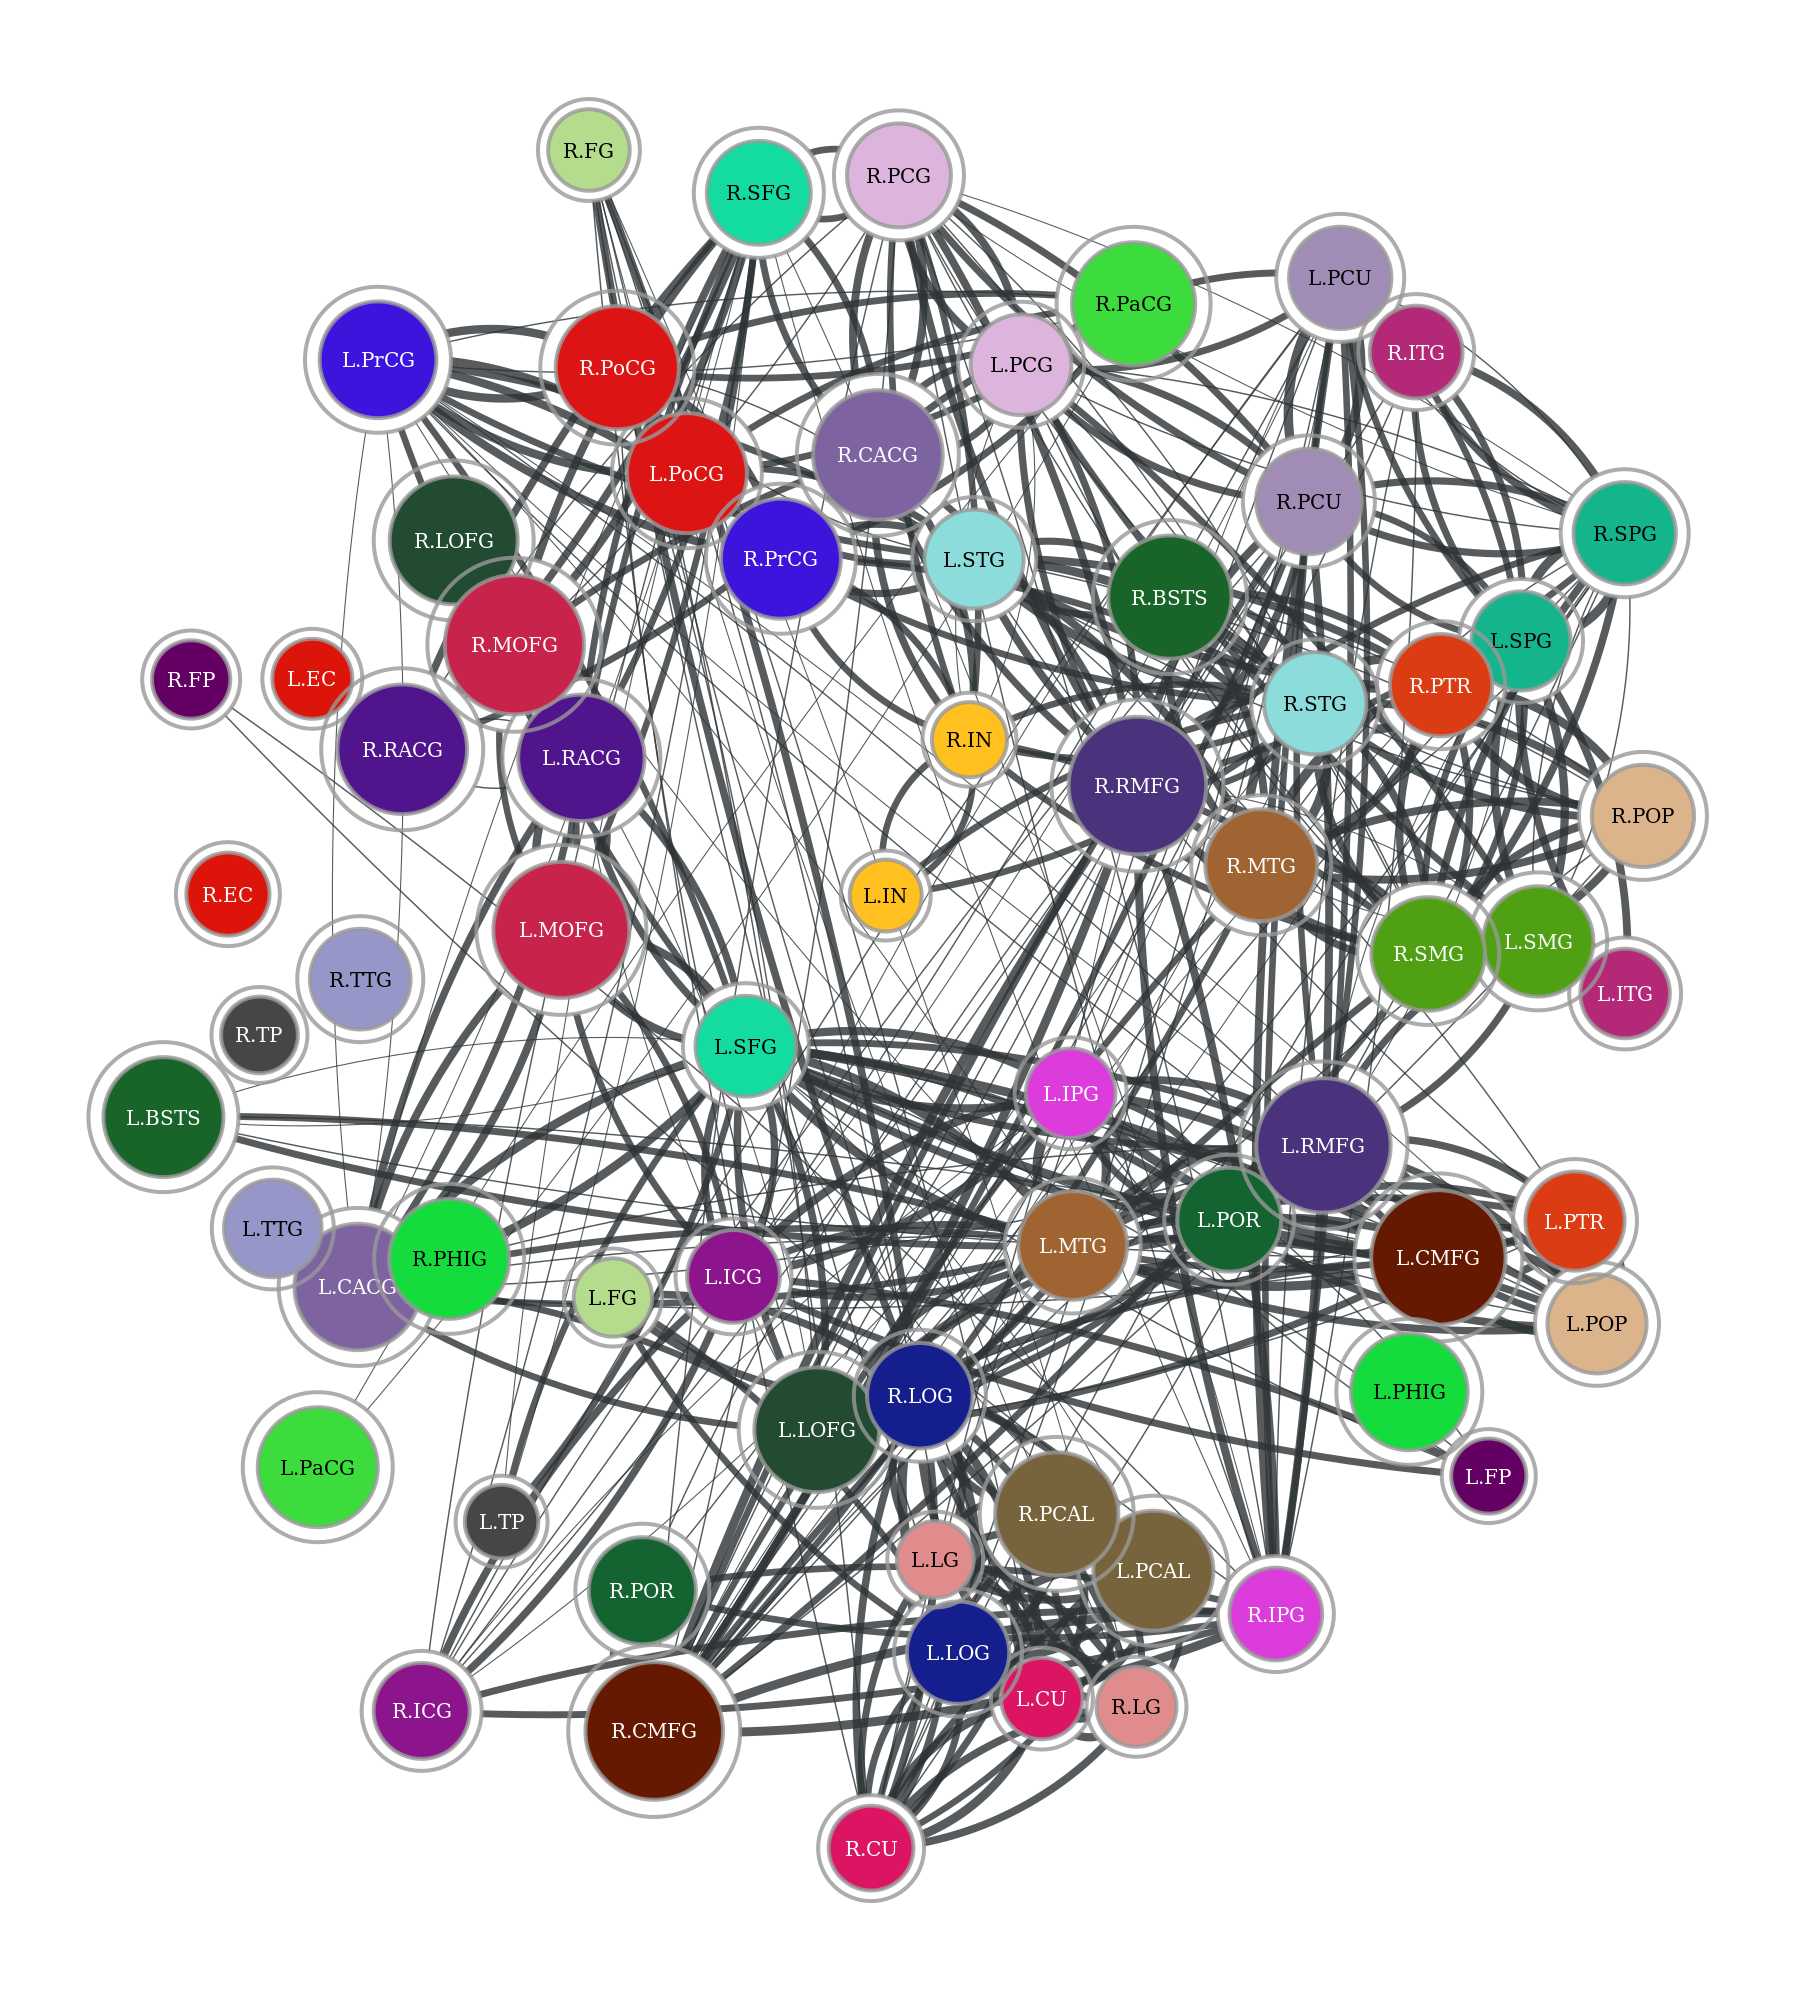

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f377116dcd0, at 0x7f3740c35710>

In [19]:
gt.graph_draw(g, pos=pos, vertex_font_size=10, vertex_shape="double_circle",
              vertex_fill_color=node_colours, vertex_pen_width=2,
              vertex_text=node_name, 
              output_size=(1000, 1000),
              edge_pen_width=ew, 
              #output="../figures/search_example.png",
              inline=True)

In [5]:
group_names = ['T', 'F', 'F', 'O', 'T', 'T', 'P', 'T', 'P', 'O', 'F', 'O', 'F', 'T', 'T', 'F', 'F', 'F', 'F', 'O', 'P', 'P', 'F', 'P', 'F', 'F', 'F', 'P', 'T', 'P', 'F', 'T', 'T', 'I', 'T', 'F', 'F', 'O', 'T', 'T', 'P', 'T', 'P', 'O', 'F', 'O', 'F', 'T', 'T', 'F', 'F', 'F', 'F', 'O', 'P', 'P', 'F', 'P', 'F', 'F', 'F', 'P', 'T', 'P', 'F', 'T', 'T', 'I']
group_colours = [(0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (1, 0.501960784313726, 0, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (1, 0.501960784313726, 0, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (1, 0.501960784313726, 0, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (1, 0.501960784313726, 0, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.274509803921569, 0.274509803921569, 0.274509803921569, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (1, 0.501960784313726, 0, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (1, 0.501960784313726, 0, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (1, 0.501960784313726, 0, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (1, 0.501960784313726, 0, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.313725490196078, 0.627450980392157, 0.07843137254902, 1), (0.588235294117647, 0.588235294117647, 0.784313725490196, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.862745098039216, 0.07843137254902, 0.07843137254902, 1), (0.274509803921569, 0.274509803921569, 0.274509803921569, 1)]

In [85]:
int(ord('F'))

70

In [62]:
adj = np.load('../figures/example_graph.npy')
adj[adj == 0] = np.nan
print(len(adj[~np.isnan(adj)]))
print(np.nanmin(adj))
print(np.nanmax(adj))
(68 * 67) / 2

454
0.5363330841064453
0.8748882412910461


2278.0

In [6]:
adj = np.load('../figures/example_graph.npy')
# Artificially increase extreme values for better plot
adj[adj > 0.55] = adj[adj > 0.55] * 1.1
adj[adj > 0.75] = adj[adj > 0.75] * 3.3
adj[adj < 0.5] = adj[adj < 0.5] * 0.6
adj[adj < 0.4] = adj[adj < 0.4] * 0.8
idx = adj.nonzero()

weights = adj[idx]
g = gt.Graph(directed=False)
g.add_edge_list(np.transpose(idx))

#add weights as an edge propetyMap
ew = g.new_edge_property("double")
ew.a = weights
g.ep['edge_weight'] = ew

node_name = g.new_vertex_property("string", vals=group_names)
g.vp['node_weight'] = node_name

node_full_names = g.new_vertex_property("string", vals=STRUCT_SIMPLE_NAMES)
g.vp['node_full_name'] = node_full_names

node_colours = g.new_vertex_property("vector<float>", vals=group_colours)
g.vp['node_colour'] = node_colours

node_hemispheres = g.new_vertex_property("int", vals=hemi_groups)
g.vp['hemi_group'] = node_hemispheres

In [11]:
state = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)
gt.draw_hierarchy(state, vertex_fill_color=node_colours, edge_pen_width=ew, output="../figures/circular_graph_example.svg",
                  layout='radial',
                  #vertex_shape="double_circle",
                  rel_order=node_name,
                  vertex_pen_width=0,
                  vertex_font_family='helvetica',
                  vertex_size=20,
                   vertex_font_size=15, vertex_text=node_name)

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb2fdcc5f50, at 0x7fb2fd4d4d50>,
 <Graph object, directed, with 78 vertices and 77 edges, at 0x7fb2fd4a25d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb2fd4a25d0, at 0x7fb2fd4a26d0>)

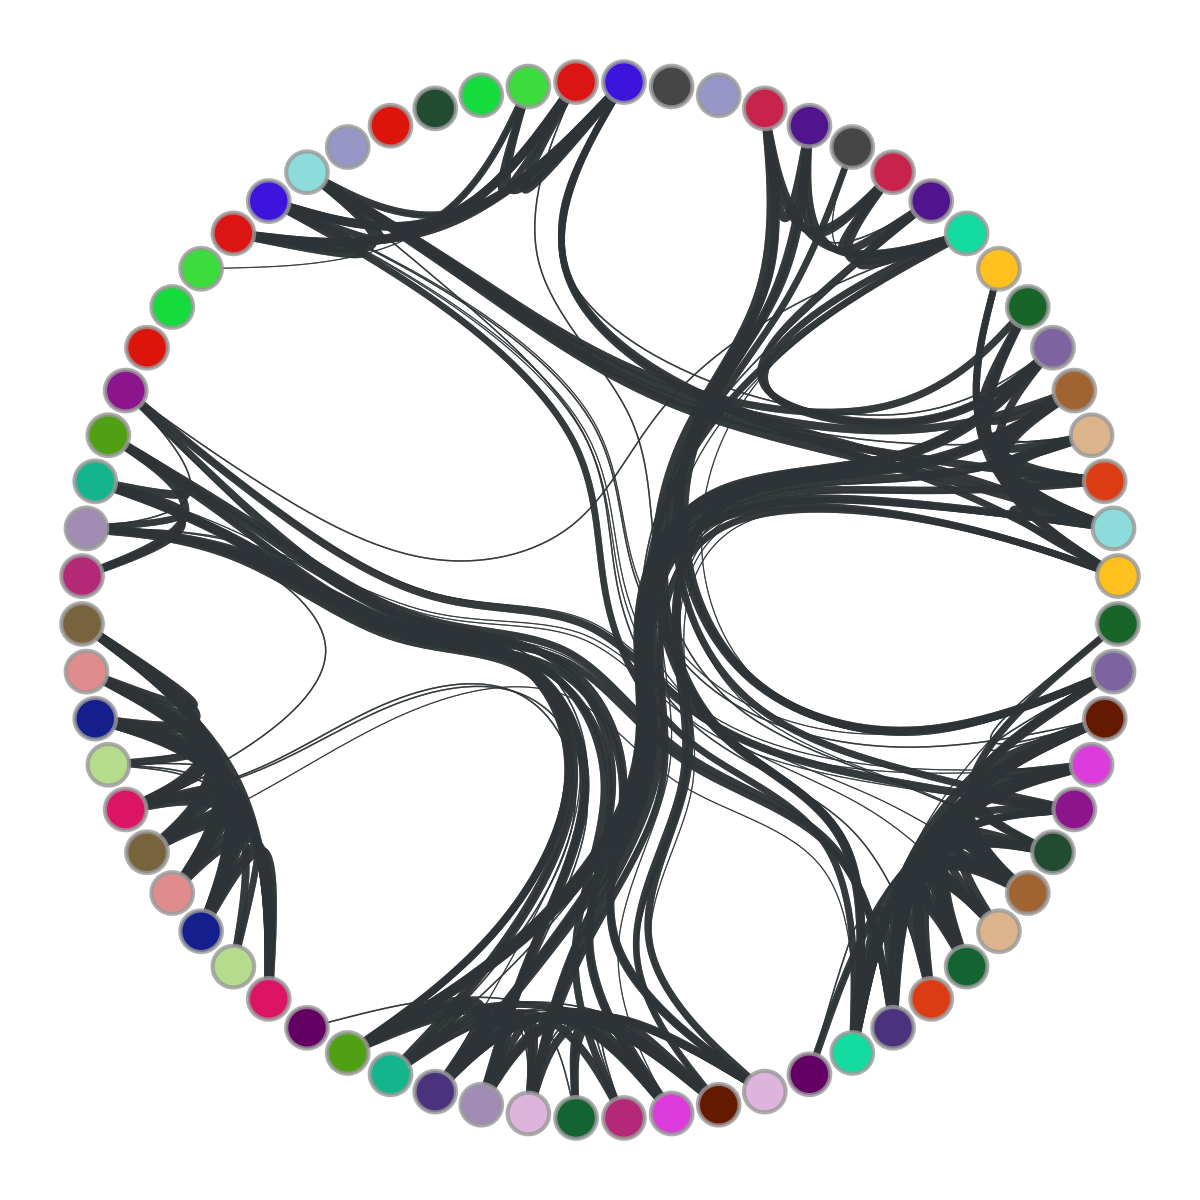

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f377116dcd0, at 0x7f3740d1f2d0>

In [14]:
state = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)
t = gt.get_hierarchy_tree(state)[0]
tpos = pos = gt.radial_tree_layout(t, t.vertex(t.num_vertices() - 1), weighted=True)
cts = gt.get_hierarchy_control_points(g, t, tpos)
pos = g.own_property(tpos)
b = state.levels[0].b
shape = b.copy()
shape.a %= 14

gt.graph_draw(g, pos=pos, edge_control_points=cts,
              vertex_fill_color=node_colours, edge_pen_width=ew)

## The actual plot from the paper

In [6]:
s_male = np.load(f'../results/dp_interp_100_n_e_diffpool_male.npy')
s_female = np.load(f'../results/dp_interp_100_n_e_diffpool_female.npy')

s_total = s_male + s_female
s_total = s_total + s_total.T

In [7]:
s_total

array([[    0., 21689., 30712., ..., 13235., 30552., 20678.],
       [21689.,     0., 22193., ..., 21586., 23035., 26091.],
       [30712., 22193.,     0., ..., 13481., 33263., 22314.],
       ...,
       [13235., 21586., 13481., ...,     0., 14387., 21789.],
       [30552., 23035., 33263., ..., 14387.,     0., 23212.],
       [20678., 26091., 22314., ..., 21789., 23212.,     0.]],
      dtype=float32)

In [2]:
def threshold_adj_array(adj_array: np.ndarray, threshold: int, num_nodes: int) -> np.ndarray:
    num_to_filter: int = int((threshold / 100.0) * (num_nodes * (num_nodes - 1) / 2))

    # For threshold operations, zero out lower triangle (including diagonal)
    adj_array[np.tril_indices(num_nodes)] = 0

    # Following code is similar to bctpy
    indices = np.where(adj_array)
    sorted_indices = np.argsort(adj_array[indices])[::-1]
    adj_array[(indices[0][sorted_indices][num_to_filter:], indices[1][sorted_indices][num_to_filter:])] = 0

    # Just to get a symmetrical matrix
    adj_array = adj_array + adj_array.T

    # Diagonals need connection of 1 for graph operations
    adj_array[np.diag_indices(num_nodes)] = 1.0

    return adj_array

In [69]:
s_total

array([[    0., 21689., 30712., ..., 13235., 30552., 20678.],
       [21689.,     0., 22193., ..., 21586., 23035., 26091.],
       [30712., 22193.,     0., ..., 13481., 33263., 22314.],
       ...,
       [13235., 21586., 13481., ...,     0., 14387., 21789.],
       [30552., 23035., 33263., ..., 14387.,     0., 23212.],
       [20678., 26091., 22314., ..., 21789., 23212.,     0.]],
      dtype=float32)

In [8]:
adj = s_total.copy()
print(np.nanmax(adj), np.nanmin(adj), np.mean(adj))
adj = threshold_adj_array(adj, 50, 68)
adj[np.diag_indices(68)] = 0
print(np.nanmax(adj), np.nanmin(adj), np.mean(adj))
adj[adj == 0] = np.nan
print(np.nanmax(adj), np.nanmin(adj), np.nanmean(adj))

34565.0 0.0 20396.168
34565.0 0.0 13083.519
34565.0 20256.0 26557.592


In [81]:
adj = s_total.copy()

adj = adj / adj.max()

adj = threshold_adj_array(adj, 50, 68)

np.fill_diagonal(adj, 0)
print(adj[(adj < 0.5) & (adj > 0)])
print(np.max(adj))

[]
1.0


In [9]:
adj = s_total.copy()

adj = adj / adj.max()

adj = threshold_adj_array(adj, 50, 68)

np.fill_diagonal(adj, 0)

# Artificially increase extreme values for better plot
adj[adj > 0.55] = adj[adj > 0.55] * 1.1
adj[adj > 0.85] = adj[adj > 0.85] * 2.5
#adj[adj < 0.5] = adj[adj < 0.5] * 0.4
#adj[adj < 0.4] = adj[adj < 0.4] * 0.1
idx = adj.nonzero()

weights = adj[idx]
g = gt.Graph(directed=False)
g.add_edge_list(np.transpose(idx))

#add weights as an edge propetyMap
ew = g.new_edge_property("double")
ew.a = weights
g.ep['edge_weight'] = ew

node_name = g.new_vertex_property("string", vals=group_names)
g.vp['node_weight'] = node_name

node_full_names = g.new_vertex_property("string", vals=STRUCT_SIMPLE_NAMES)
g.vp['node_full_name'] = node_full_names

node_colours = g.new_vertex_property("vector<float>", vals=group_colours)
g.vp['node_colour'] = node_colours

node_hemispheres = g.new_vertex_property("int", vals=hemi_groups)
g.vp['hemi_group'] = node_hemispheres

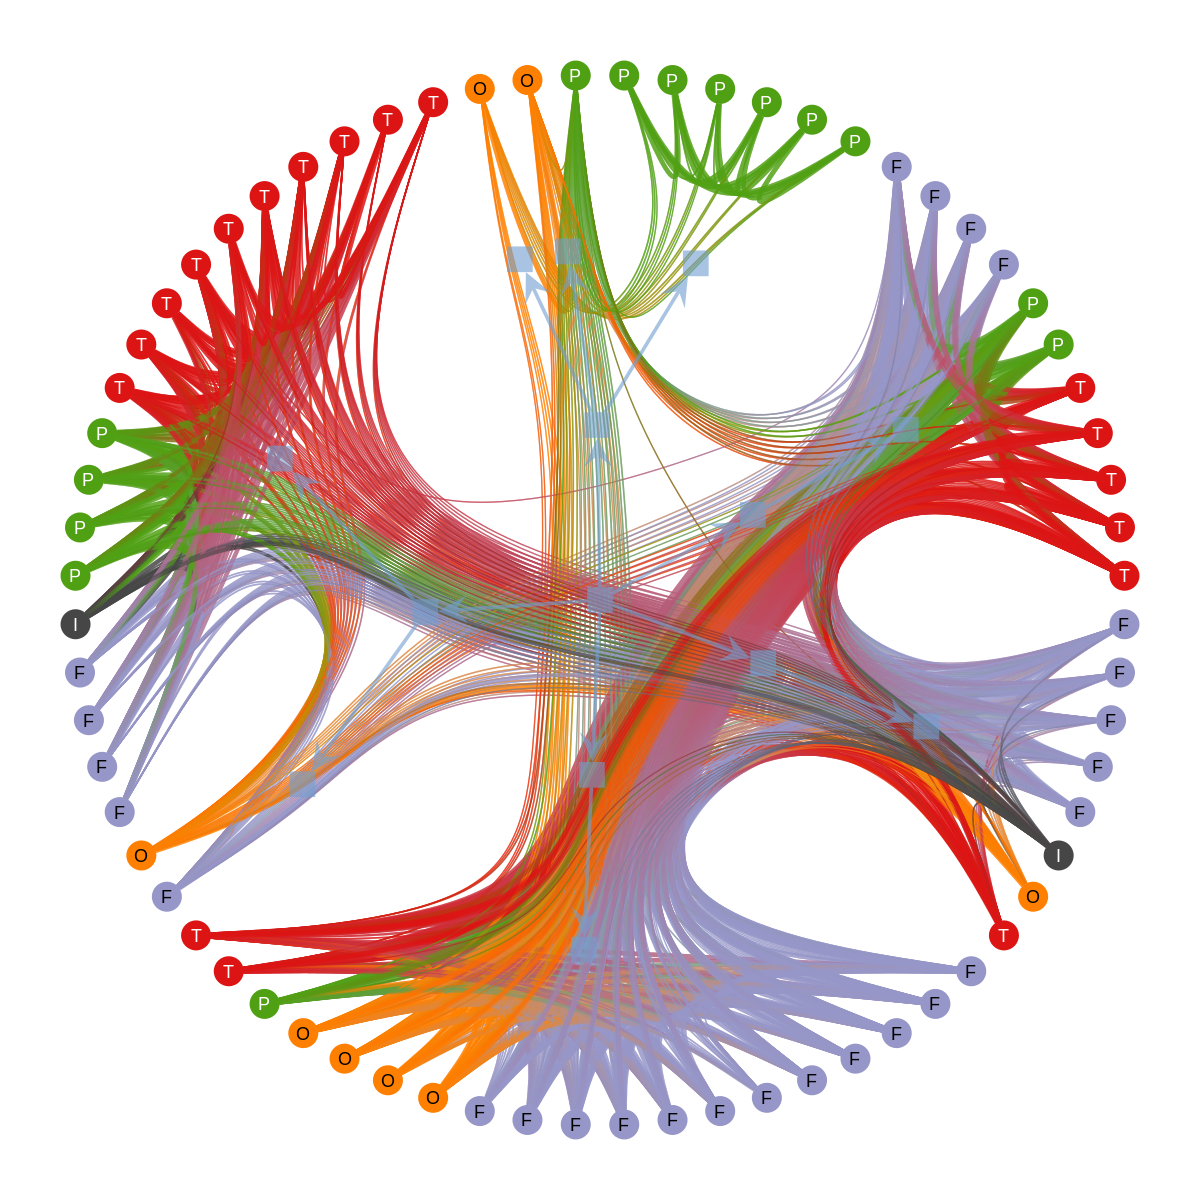

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f1be76d0b10, at 0x7f1be6a2ded0>,
 <Graph object, directed, with 82 vertices and 81 edges, at 0x7f1bf5422b90>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f1bf5422b90, at 0x7f1d18f8e790>)

In [10]:
state = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)
gt.draw_hierarchy(state, vertex_fill_color=node_colours, edge_pen_width=ew, 
                  output="../figures/graph_dp_50.pdf",
                  layout='radial',
                  #vertex_shape="double_circle",
                  rel_order=node_name,
                  vertex_pen_width=0,
                  vertex_font_family='helvetica',
                  vertex_size=15,
                  #vertex_font_size=7, 
                  vertex_text=node_name)

In [87]:
1

1